# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


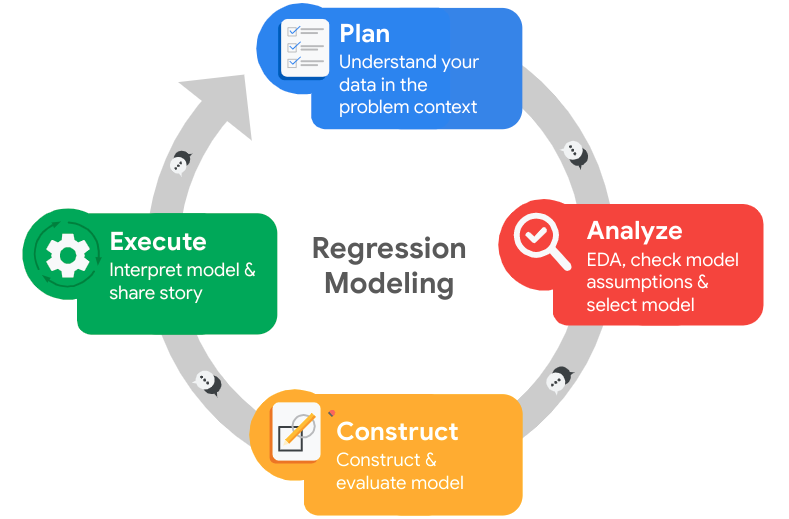

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




**Who are your stakeholders for this project?**
>The stakeholders for this project are Salifort's senior leadership team and Human Resources department.
    
**What are you trying to solve or accomplish?**
>The goal of this project is to build a statistical or machine learning model that can predicts whether or not an employee will leave the company, and leveraging this model to gain insights into factors that contribute to employees departures.

**What are your initial observations when you explore the data?**
>Here are some initial observations:
- The survey has data from 14999 employees of Salifort, with 10 features
    - 2 Categorical variables:
        - "Department" : Need to check categories
        - "salary" : hierarchical low-medium-high
    - 8 Numerical variables:  
        - "left" : binary target variable
        - "satisfaction_level" and "last_evaluation" : percentages
- Misses some important analysis features like job title data and departure date
- No personal or sensible information

**What resources do you find yourself using as you complete this stage? (Make sure to include the links.)**
>Here are some resources related to our problem of employee churning. It helps me begin to think about what I will be looking for in my data in order to build a model.
https://medium.com/%40prakathi/predicting-employee-attrition-comparing-logistic-regression-and-decision-tree-models-b76748b36ed4
https://www.researchgate.net/publication/378709897_Machine_Learning_Techniques_in_Employee_Churn_Prediction

**Do you have any ethical considerations in this stage?**
> I have not so much information about data collection. When was this survey responses collected by HR? During the last evaluation? It is worth noting that "satisfaction_level" is a measure taken at one point in time and may not be representative of an employee satisfaction over time. 

> We have the data about employee leaving the company, but can we be sure this data represents employees that left the company on their own or just the ones being laid off?


> Also, do we have consent to use employee information to this end?

What I did: 

>

Comments:

>

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
pip install --upgrade scikit-learn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import packages
### YOUR CODE HERE ### 

# Operational packages
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, fbeta_score

# Other functions
from scipy.signal import argrelextrema
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

What I did: 

>I imported operational libraries like pandas and numpy for tabular data manipulations. Also, I'll need some visualization packages like matplotlib and seaborn.


### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###

df0.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
### YOUR CODE HERE ###

# Copy dataset in a new DataFrame
df = df0.copy()

# Get basic information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


What I did: 

> I made first a copy of the original dataset to work with. If needed, I could make new copies of df0 for other purposes later. Then, I used the method .info() to get basic information.

Comments:

>As we said earlier, we got 8 numerical variables and 2 categorical variables, and we can already see that this dataset doesn't contains any null values.

### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###

df.describe(include='all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


What I did: 

>I used the .describe() method to obtain descriptive statistics of my data and I specified the argument "include='all'" to take a look at all variables including categorical variables

Comments:

>This allows us to draw a couple of observations:
- Mean satisfaction level is around 61%, with a maximum of 100% and a minimum level of 9%. Half of the employee have said to be moderately dissatisfied with their job to very dissatisfied. 
- The mean of last evaluation score is around 72%, with a max of 100% and a minimum of 36%
- The number of project each employee has been attributed to varies from 2 to 7, with an average of about 4
- The average monthly hours is around 200 hours, with the longest average being 310 (around 15 hours per working day which is very high) and the lowest 96 (around 5 hours per day)
    - The average working hours is 40 hours higher higher than normal 40 hours/week months (160 hours per month), meaning the majority of employees are working overtime. Maybe it can be a good correlator
- This dataset doesn't include employees who spent less than 2 years working for this company, neither more than 10 years. More than half of the employees have worked more than 3 years in this sample. 
- The mean of work accident is around 0.145, which means that around 14.5% of employees already had an accident while at work.
- Similarly, we can see that there is approximately 23.8% of the employees in this dataset that have left the company. As a note, we can see that the dataset is unbalanced towards staying employees, but not extremely so.
- It says that around 2.1% of employees received a promotion in the last 5 years. Since 75% of the employees worked less than 4 years for the company, it means not many received any promotion since they worked at this company.
- The dataset contains data from 10 departments, with sales comprising the most at 4140 (27.6% of all data)
- There is 3 categories of salary (low, medium and high), and there is more low salary employees (unsurprisingly) than other : 7316 (48.8%)

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
### YOUR CODE HERE ###

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

What I did: 

> I used .columns attribute to visualize an array of the column names of the DataFrame "df"

Comments:

- 'average_montly_hours' can be more concise: 'avg_monthly_hours'
- 'promotion_last_5years' : 'promo_last_5yrs'
- 'Work_accident' and 'Department' have caps letters which is not our standardized format

In [7]:
# Rename columns as needed
### YOUR CODE HERE ###
df = df.rename(
    {
    'average_montly_hours':'avg_monthly_hours', 
    'Work_accident':'work_accident', 
    'promotion_last_5years':'promo_last_5yrs',
    'Department':'department'
    }, 
    axis=1
)

# Display all column names after the update
### YOUR CODE HERE ###

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promo_last_5yrs', 'department', 'salary'],
      dtype='object')

What I did: 

> I used .rename() method with a Python dictionary to change names to more concise or standardized names, then I validaded the results with .columns attribute. 


### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
### YOUR CODE HERE ###

df.isnull().sum()


satisfaction_level    0
last_evaluation       0
number_project        0
avg_monthly_hours     0
time_spend_company    0
work_accident         0
left                  0
promo_last_5yrs       0
department            0
salary                0
dtype: int64

What I did: 

> I used .isnull() method to generate a binary matrix of null values and I counted the total of null values for each column with .sum() method

Comments:

>We confirm there is no missing values in this dataset, as we previously thought

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
### YOUR CODE HERE ###

df.duplicated().sum()


3008

What I did: 

> I used the .duplicated() method to generate a binary series of exactly matching rows with .sum() to count the total

Comments:

>There is 3008 duplicated rows in this dataset. This is a lot (20%) and it can have a negative impact on the quality of our analysis.

In [10]:
# Inspect some rows containing duplicates as needed
### YOUR CODE HERE ###

df[df.duplicated()]

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,left,promo_last_5yrs,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Unique duplicated patterns

df[df.duplicated(keep=False)].drop_duplicates().shape[0]

2338

What I did: 

> I used the .duplicated() method to serve as a mask and take a look at duplicated rows without the first row that was duplicated (considered the original). After that, I evaluated the number of unique patterns to see how many rows were copied. 

Comments:

>At a glance, I cannot see a visible pattern, it might just be the result of some mistake. The probability that two employees had the same satisfaction score, the same evaluation score, worked the same amount of hours for the same amount of time in the same department, etc. are infinitesimal. Maybe if there was two exact individuals, it could have been so, but seeing 20% of the data are duplicata, then it is, beyond a reasonable doubt, a data integrity problem.

> Also, some duplicated rows were duplicated more than once. Unique patterns count is 2338 out of 3008

> For these reasons, I consider these rows to be clear mistakes and I will drop depulicated rows of exact match. 

> Since we don't have unique user ID for each row, we cannot verify if other rows are duplicated with only slight changes in the data

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
### YOUR CODE HERE ###

df_clean = df.drop_duplicates(ignore_index=True)
print(df_clean.shape)

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###

# Let's see if desciptive statistics have changed much
df_clean.describe(include='all')

(11991, 10)


,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,left,promo_last_5yrs,department,salary
count,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991.000000,11991,11991
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3239,5740
mean,0.629658,0.716683,3.802852,200.473522,3.364857,0.154282,0.166041,0.016929,NaN,NaN
std,0.241070,0.168343,1.163238,48.727813,1.330240,0.361234,0.372133,0.129012,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.480000,0.570000,3.000000,157.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.660000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.860000,5.000000,243.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


In [13]:
df[df.duplicated()]['left'].sum()

1580

What I did: 

>I dropped all exact duplicates and reset the index, then validated the shape. After that, I verified the descriptive statistics.

Comments:

>We can confirm the new dataset have dropped exactly 3008 rows (14999 - 3008 = 11991 rows). Statistics have not changed drastically. However, the proportion of employees that left the company are only around 16.6% now. As a matter of fact, 1580 rows represented employees that had left the company (about half the duplicated rows). Our dataset is now more imbalanced with even fewer data, but not extremely so.

### Check outliers

Check for outliers in the data.

In [14]:
def boxplot(col=str):
    sns.boxplot(df_clean[col])
    plt.title(f'Boxplot distribution of "{col}"')
    plt.show()

In [15]:
len(df_clean.columns)

10

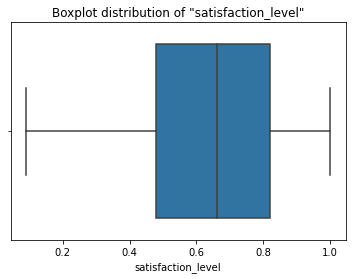

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
### YOUR CODE HERE ###

boxplot(df_clean.columns[0])

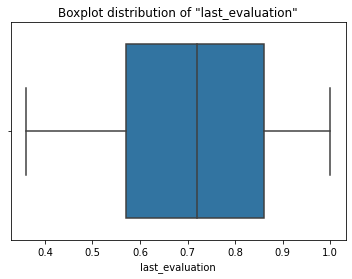

In [17]:
boxplot(df_clean.columns[1])

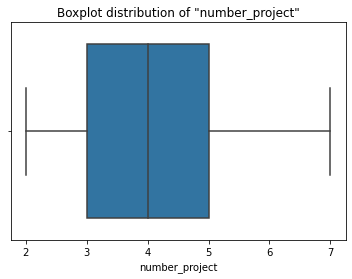

In [18]:
boxplot(df_clean.columns[2])

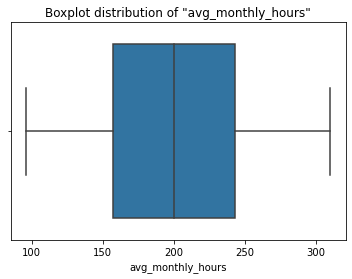

In [19]:
boxplot(df_clean.columns[3])

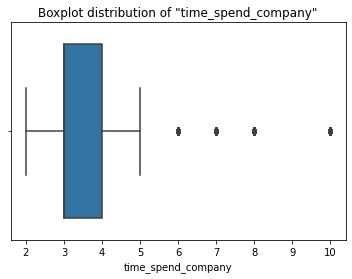

In [20]:
boxplot(df_clean.columns[4])

What I did: 

>I evaluated if there was numerical non-binary columns that countains outliers. I created a function called 'boxplot' to facilitate the drawing of the boxplots.

Comments:

>Only the feature "time_spend_company" countains global outliers. But this is normal, since it represent employees who have been at the company for a long time. This is normal data. However, depending on the model selected, I might need to remove them later.

In [21]:
# Determine the number of rows containing outliers
### YOUR CODE HERE ###

outliers_rows = (df_clean['time_spend_company'] > 5).sum()

outliers_rows

824

In [22]:
outliers_rows / df_clean.shape[0]

0.06871820532065716

What I did: 

>I created a boolean Series where it evaluated how many employee have spent more than 5 years in this company

Comments:

>There is 824 employees who have spent more than 5 years in this company (around 6.9% of total). 

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [23]:
# Get numbers of people who left vs. stayed
### YOUR CODE HERE ###

print(df_clean['left'].value_counts())

# Get percentages of people who left vs. stayed
### YOUR CODE HERE ###
print()
print(df_clean['left'].value_counts(normalize=True)*100)

0    10000
1     1991
Name: left, dtype: int64

0    83.39588
1    16.60412
Name: left, dtype: float64


What I did: 

>I used .value_counts() method to count the different values of 'left' variable, with the argument "normalize=True" for percentage

Comments:

>There are 10,000 people who stayed in the company (83.4%) and 1991 who left (16.6%). 

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

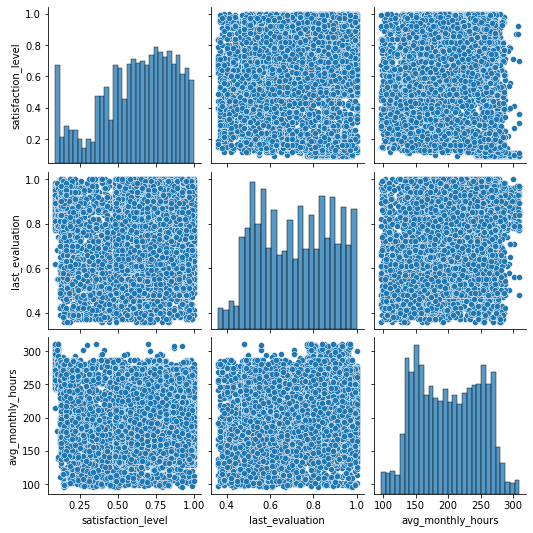

In [24]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.pairplot(df_clean[['satisfaction_level', 'last_evaluation', 'avg_monthly_hours']]);


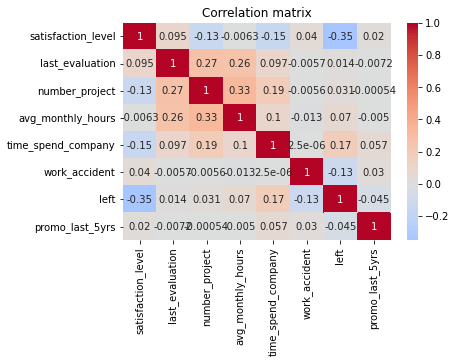

In [25]:
# Create a plot as needed
### YOUR CODE HERE ###

corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix')
plt.show()

What I did: 

>I plotted continuous numerical variables to see if there was multicollinearity between them and to visualize the distribution, then a correlation matrix

Comments:

>There is no pattern for multicollinearity between continuous variables and none of the distributions are normal-shaped.

> There is a moderately weak linear correlation between employee leaving and satisfaction level, which is not surprising, but I expected stronger correlation

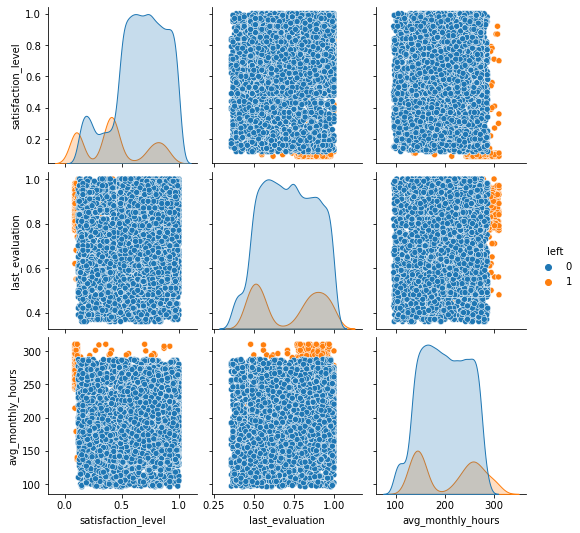

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.pairplot(df_clean, vars=['satisfaction_level', 'last_evaluation', 'avg_monthly_hours'], hue='left');


What I did: 

>I plotted the same graphs but with a different hue for those who left

Comments:

>We can see some interesting insights.
- Satisfaction level tends to be high amongst the employees who stayed. For the employee who left, there is three distinct patterns : a small group of relatively satisfied, a larger group of moderately dissatisfied employees and, finaly, unsurprisingly, a group of very dissatisfied employees
- Judging from their last evaluation score, there is binomial trend in employees who left. There is a group who performed well in their job and a group that underperformed. Maybe the first group are those who felt in need of more challenges, and the second one comprises those that were either laid off or were demotivated
- We also see a binomial distribution in the average monthly hours worked by employees who left: one subgroup worked less than company's average, and one group worked way more, and are amongst the workers who worked more.

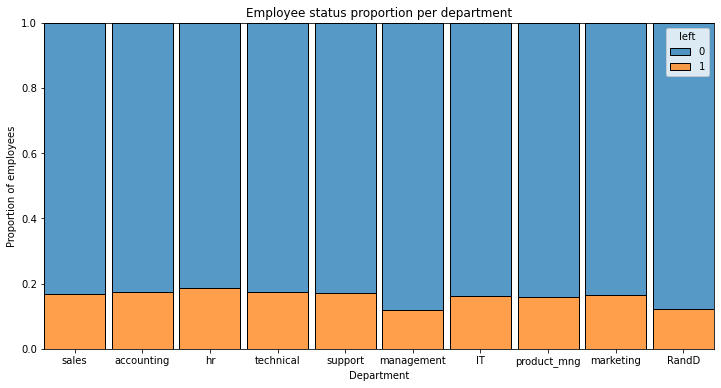

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###

plt.figure(figsize=(12,6))

sns.histplot(data=df_clean, x='department', hue='left', multiple='fill', shrink=0.9)

plt.title('Employee status proportion per department')
plt.ylabel('Proportion of employees'); plt.xlabel('Department')
#plt.xticks(rotation=45, ha='right')
plt.show()

What I did: 

>I plotted a bar graph showing the distribution of employee attrition per department in relation with total employees

Comments:

>In a sense, there seems to be a pretty uniform distribution between department of employee leaving. At first glance, it doesn't seems that employee turnover is closely associated with one particular department


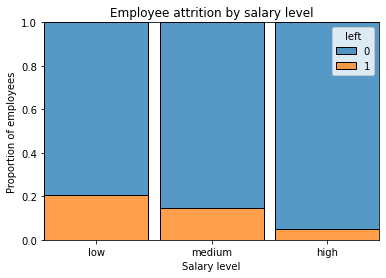

In [28]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.histplot(data=df_clean, x='salary', hue='left',  multiple='fill', shrink=0.9)
plt.title('Employee attrition by salary level')
plt.xlabel('Salary level'); plt.ylabel('Proportion of employees')
plt.show()

What I did: 

>I plotted a bar graph showing the distribution of employee attrition per salary level

Comments:

>Low salary employee have unsurprisingly a higher tendency of leaving a company

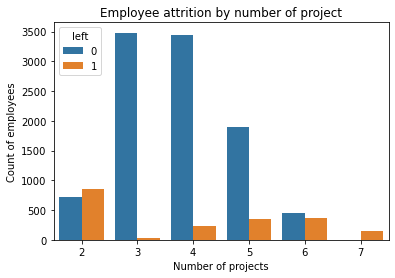

In [29]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.countplot(data=df_clean, x='number_project', hue='left')
plt.title('Employee attrition by number of project')
plt.xlabel('Number of projects'); plt.ylabel('Count of employees')
plt.show()

What I did: 

>I plotted a bar graph showing the distribution of employee attrition by number of project they've been working on

Comments:

>Interestingly, there seems to be an influence of the number of projects an employee is attributed for his departure.
- For those who have only 2 projects, there is a high rate of departure : maybe they find the job boring
- It's interesting to see that the sweet spot seems to be 3 projects, as we count almost no departure from this dataset for it
- More than 3 projects, there is a higher rate of employee going away the more project they have
- At 7 projects, there is no or almost no one that stayed in the company, so it seems to be the absolute breakup point (from this dataset)

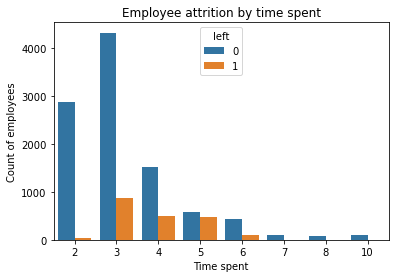

In [128]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.countplot(data=df_clean, x='time_spend_company', hue='left')
plt.title('Employee attrition by time spent')
plt.xlabel('Time spent'); plt.ylabel('Count of employees')
plt.show()

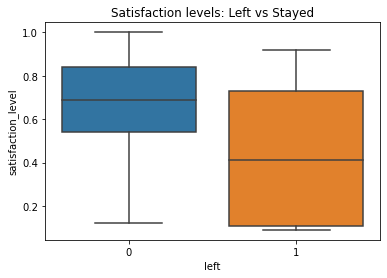

In [31]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df_clean, x='left', y='satisfaction_level')
plt.title('Satisfaction levels: Left vs Stayed')
plt.show()

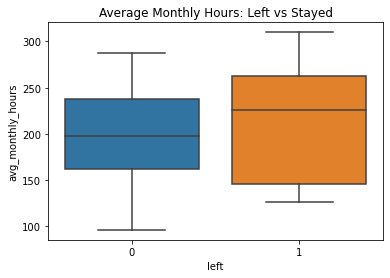

In [32]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.boxplot(data=df_clean, x='left', y='avg_monthly_hours')
plt.title('Average Monthly Hours: Left vs Stayed')
plt.show()

What I did: 

>I plotted the boxplot distribution of satisfaction level against and average monthly hours against the "left" variable.

Comments:

>We begin to see a pattern : People who have a lot of projects, tend to work more, which may leads to less satisfaction and eventually more departures.

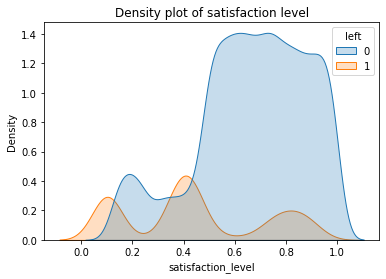

In [33]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.kdeplot(data=df_clean, x='satisfaction_level', hue='left', fill=True)

plt.title('Density plot of satisfaction level')

plt.show()


In [34]:
def find_kde_minima(ax):

    kde_line = ax.lines[-1]

    x=kde_line.get_xdata()
    y=kde_line.get_ydata()

    min_idx = argrelextrema(y, np.less) # find a minima if the point is lower than the point immediately after of immediately before

    x_minima = x[min_idx]
    y_minima = y[min_idx]

    return x_minima, y_minima

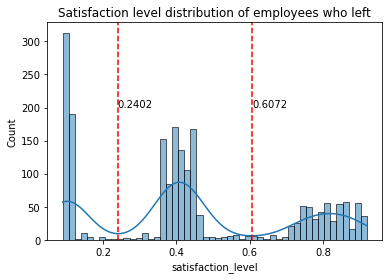

In [35]:
df_left = df_clean[df_clean['left']==1]

fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_left['satisfaction_level'], kde=True, bins=50, ax=ax)

x_minima, y_minima = find_kde_minima(ax)

for x in x_minima:
    ax.axvline(x=x, linestyle='--', color='r')
    ax.text(x, 200, f"{x:.4f}")

plt.title('Satisfaction level distribution of employees who left')

plt.show()

What I did: 

>Here I tried to find groups for satisfaction levels among left employees. For this, I found the 2 minima of the kde curve to split the groups in three based on a threshold

Comments:

>The three groups are:
- Very dissatisfied employees (less than 25% satisfaction)
- Moderately dissatisfied employees (between 25% and 60% satisfaction). They are "moderately dissatisfied" and not "moderately satisfied" because there is a lot of data below 50% in this group
- Satisfied to very satisfied employees (more than 60% satisfaction)

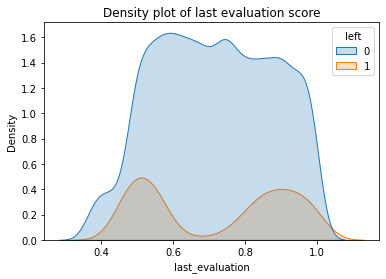

In [36]:
# Create a plot as needed
### YOUR CODE HERE ###

sns.kdeplot(data=df_clean, x='last_evaluation', hue='left', fill=True)

plt.title('Density plot of last evaluation score')

plt.show()


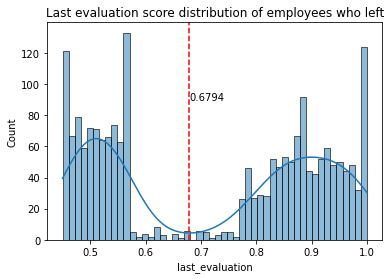

In [37]:
fig, ax = plt.subplots(figsize=(6,4))

sns.histplot(data=df_left['last_evaluation'], kde=True, bins=50, ax=ax)

x_minima, y_minima = find_kde_minima(ax)

for x in x_minima:
    ax.axvline(x=x, linestyle='--', color='r')
    ax.text(x, 90, f"{x:.4f}")

plt.title('Last evaluation score distribution of employees who left')

plt.show()

What I did: 

>Here I tried to find groups for last evaluation score among left employees. For this, I found also the minima to distinguish between the two groups.

Comments:

>The two groups are:
- Low performance employees (less than 68% scores)
- High performance employees (68 % and more scores)

> With this, we can combine these results with the previous ones to generate 6 distinct groups between all our data (left and retained employees) and see if it doesn't contains any more insights. I will also try to label some "types" for this group, to help the thinking process. I'll also add the label.
- Very dissatisfied employees with low performance (Disengaged) "VD_LP"
- Very dissatisfied employees with high performance (Frustrated) "VD_HP"
- Moderately dissatisfied employees with low performance (Inconsistent) "MD_LP"
- Moderately dissatisfied employees with high performance (Commited but not fully satisfied) "MD_HP"
- Satisfied to very satisfied employees with low performance (Content without doing much) "S_LP"
- Satisfied to very satisfied employees with high performance (Valorized and engaged) "S_HP"

In [38]:
condlist = [
    (df_clean.satisfaction_level < 0.25) & (df_clean.last_evaluation < 0.68),
    (df_clean.satisfaction_level < 0.25 ) & (df_clean.last_evaluation >= 0.68),
    (df_clean.satisfaction_level.between(0.25,0.60)) & (df_clean.last_evaluation < 0.68),
    (df_clean.satisfaction_level.between(0.25,0.60)) & (df_clean.last_evaluation >= 0.68),
    (df_clean.satisfaction_level > 0.60) & (df_clean.last_evaluation < 0.68),
    (df_clean.satisfaction_level > 0.60) & (df_clean.last_evaluation >= 0.68)
]

choicelist=[
    'VD_LP',
    "VD_HP",
    "MD_LP",
    "MD_HP",
    "S_LP",
    "S_HP"
]

df_clean['archetype'] = pd.Categorical(np.select(condlist, choicelist), categories=choicelist, ordered=True)

df_clean.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,left,promo_last_5yrs,department,salary,archetype
0,0.38,0.53,2,157,3,0,1,0,sales,low,MD_LP
1,0.80,0.86,5,262,6,0,1,0,sales,medium,S_HP
2,0.11,0.88,7,272,4,0,1,0,sales,medium,VD_HP
3,0.72,0.87,5,223,5,0,1,0,sales,low,S_HP
4,0.37,0.52,2,159,3,0,1,0,sales,low,MD_LP


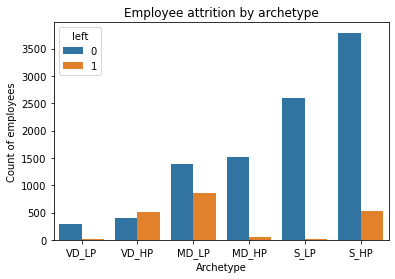

In [39]:
sns.countplot(data=df_clean, x='archetype', hue='left')
plt.title('Employee attrition by archetype')
plt.xlabel('Archetype'); plt.ylabel('Count of employees')
plt.show()

What I did: 

>I created a new column called 'archetype' that identify each employee with a label from the categories we have distinguished above, than generate a bar chat to compare employee attrition over these different groups

Comments:

> This helps us distinguish between different problematic situations at a glance.
- Retained employees are more generally the more satisfied one, regardless of their performance
- Among the very dissatisfied employees (VD), we see that the highest proportion that leaves are high performers (HP). This group is then particularly at risk because there is more member from it that leaves the company than there is that stays. This group represent frustrated employees who works hard but are at risk of burning out
- For the moderately dissatisfied group (MD), most employees who leave are by contrast low performers. They are not that much invested in the company and doesn't care much about the results. They may be in the wrong environment
- For the satisfied to very satisfied group, the attrition is among the high performer group. This can be surprising because they are be the most valued and engaged members of the organization. 
- If we look at this from another angle, low performers attrition are generally moderately satisfied, and high performers attrition are either very dissatisfied (frustrated) or satisfied to very satisfied. I think we should give a lot of attention to the causes that push these two later groups to leave, because they constitue the backbone of the organization strength and are mostly valued for their dedication and quality of work.

In [40]:
group = df_clean.groupby(['archetype', 'left'])

archetypes_means = group.agg(size=('satisfaction_level','size')).join(group.mean())

archetypes_means

size  satisfaction_level  last_evaluation  number_project  \
archetype left                                                              
VD_LP     0      297            0.185219         0.547609        4.552189   
          1       16            0.155000         0.568750        5.187500   
VD_HP     0      404            0.182252         0.835149        4.450495   
          1      512            0.103477         0.870957        6.171875   
MD_LP     0     1397            0.485075         0.543629        3.578382   
          1      864            0.408183         0.512407        2.087963   
MD_HP     0     1511            0.502581         0.830417        3.745864   
          1       49            0.459388         0.847959        4.081633   
S_LP      0     2600            0.798254         0.566796        3.755769   
          1       20            0.734500         0.560000        3.700000   
S_HP      0     3791            0.799921         0.835861        3.770509   
          1      530            0.813679         0.918057        4.549057   

                avg_monthly_hours  time_spend_company  work_accident  \
archetype left                                                         
VD_LP     0            201.646465            4.380471       0.191919   
          1            211.437500            4.125000       0.125000   
VD_HP     0            202.933168            4.445545       0.183168   
          1            274.593750            4.087891       0.050781   
MD_LP     0            186.100215            3.211883       0.163207   
          1            147.128472            3.030093       0.052083   
MD_HP     0            200.612839            3.325612       0.175381   
          1            206.428571            3.857143       0.061224   
S_LP      0            199.755000            3.180769       0.175385   
          1            203.750000            3.900000       0.050000   
S_HP      0            201.815352            3.097072       0.175415   
          1            243.711321            5.064151       0.052830   

                promo_last_5yrs  
archetype left                   
VD_LP     0            0.020202  
          1            0.000000  
VD_HP     0            0.014851  
          1            0.001953  
MD_LP     0            0.020759  
          1            0.005787  
MD_HP     0            0.021178  
          1            0.000000  
S_LP      0            0.019231  
          1            0.050000  
S_HP      0            0.018992  
          1            0.001887

What I did: 

>After visualizing what where the attrition of employees archetypes, I took a look at the mean of numerical variables. I looked into the modes and frequency of categorical variables (department and salary) but it didn't yield significative results other than what we already know.

Comments:

> We can draw some lines here:
- It is a constant that employee who left the company received less promotion (around 10 times less) in the past 5 years than retained employees. Interestingly, there doesn't seem to be an equal system of promotion. Low performers are often more recompensed than high performers, which can lead to a perceived injustice.
- Interestingly, retained employees tend to have a lot more accident. Work accident may therefore not be a good predictor as it doesn't seems to chase employees away, but it can be hard to affirm that it is positive factor in retaining employees!
- satisfied/very satisfied employees with high performance who left the company spent more time at the company than any other category (around 5 years on average), which indicates their seniority, but they work more than average, and more than other satisfied employees by around 40 hours a month. They also have one more project on average than other satisfied employees. They are also the category with the highest satisfaction level and highest evaluation score. They are happy and they are good. Are they leaving because they are retiring or because of the workload?
- Very dissatisfied employees are also among the most senior employees (averaging more than 4 years). They also tend to work more and have more projects
- Among the very dissatisfied employees, high performing ones that left the company are the ones that spend the most time per month at work, on average, by almost 75 hours. They also have a lot of project (6 on average), so they are good workers that are likely frustrated by the workload and not being adequately compensated for it.
- Finally, the moderately dissatisfied employees that left who were also low performers have less project on average (2) and work around 50 hours less than average over a month. They also seem to have less year of experience than other groups. This group may represent bored employees who are not asked enough or have the feeling they are not valued. But some of them might also be workers who are in the wrong place.

### Insights

Across Salifort, employees are on average moderately satisfied (around 61%), and they have an average of relatively good performance score (72%). Employees in this company are working a lot: around 200 hours per month (way above the regular 160 hours or so of 40-hours weeks). 

The survey data from 14,999 employees provided by Human Resources had 20% exactly duplicated values that were removed, leaving a total of 11,991 valid entries. 

16.6% of employees from this dataset had left the company. This is imbalanced for model building, but not extremely so.

When we look closely the level of satisfaction, we can say that those who stayed are generally more satisfied with their work, but we can distinguish 3 singular and distinct groups from those who left: 
Very dissatisfied employees (< 25% satisfaction) 
Moderately dissatisfied employees (between 25% and 60% satisfaction) 
Satisfied to very satisfied employees (> 60% satisfaction) 

Similarly, we identified a bimodal structure in the last evaluation score of the employees who left: 
Low performance group (< 68% score) 
High performance group (>= 68% score) 

Combining satisfaction and performance, it reveals 6 (3 x 2) employee archetypes: 

1. Very dissatisfied employees with high performance 

    This is the most critical group as there is more than half of them that have left the company. They work extensively (75 more hours by month on average), have a lot of projects and are well evaluated. We see these employees as frustrated, stressed-out and overloaded workers that do a great job but suffer from proper recognition. 

2. Satisfied employees with high performance 

    Surprising group to find a lot of turnover that count the most satisfied and performant employees who are estimed and engaged. The employees that leaves from this group are those that were the most satisfied (81% avg), performant (92% avg) and had the most experience (5 years avg). In other words, Salifort is now losing hi most valuable employees. It is worth noting that they have a big load of work (in terms of number of hours or projects). We see them as senior employees who may be looking for lighter job workload elsewhere or simply retiring. 

3. Moderately dissatisfied with low performance 

    This group is the last critical group where there is a lot of turnover happening, and their numbers are the highest in absolute number (864 persons). This group is poorly-invested and under-used by the company : they are working on 2 projects on average with around 50 hours less per month. We see this group as uninvested employees or ill-affected ones. We see them as understimulated indivuals, lacking interest in their job, prompting them to find another. 

4. Very dissatisfied with low performance 

    This group is also surprising, because they are significantly less at risk of going away. We see them as disengaged employees that don't care about the quality of their work but, even though they are dissatisfied, they don't want to leave. 

5. Moderately dissatisfied with high performance 

    There is not a lot of turnover from this group also. We see them as good employees that are a little uncomfortable with something about their work. 

6. Satisfied with low performance 

    This is a problematic group but not because it as a high attrition rate. In fact, the turnover proportion is the lowest for this group than any other (0.7%). They are comfortable, but doing only average work. It seems that low performance is well tolerated in the enterprise's culture workload seems to play a large role in this company. 

Too much workload with little recognition leads to higher departure rate, and too little leads to disengagement. I would recommend Salifort leadership to find a balance between a sane workload and recognition level. 

We can highlight a few points from the data to help improve company's environment and reduce attrition: 
- There seems to be insufficient recognitions: only 2% of employees received a promotion in the last 5 years 
    - Furthermore, employee who stayed had a higher promotion proportion than those who leaved 
    - Also, there seems to be an equity imbalance in employee work recognition. 
    - Employees scoring low performance reviews often receive as many or even more promotions than high performers 
- Obviously, higher salary correlates with less departures 
- As for the workload, it is interesting to note that: 
    - 3 projects seems to be the sweet spot, as there a very few employees who leave that has 3 projects 
    - 4 is very good, and 5 projects is still fine 
    - for less than 3 projects, the data shows there is more than 50% attrition rate 
    - more than 5 projects (6-7) shows also alarming turnover 

Some final remarks: 
- The attrition is uniform across all departments, which indicates a systemic problem rather than a localised issue 
- Work accidents surprisingly doesn't affect departures. In fact, a higher proportion of employees who had an accident stayed.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

It's a supervised learning classification task with a binary classification problem.

### Identify the types of models most appropriate for this task.

For this task, the common most appropriate type of models are:
- Logistic regression
- Naive Bayes
- Decision Tree
- Random Forest
- XGBoost

For our problem, Random Forest and XGBoost models would probably give the more accurate predictions. However, beyond precision, the important goal here is to understand why employees leave to allow leadership to not only predict which or how many employees are at risk of leaving the company, but providing them with insights as to what factor drives the most employee departures. Random Forest and XGBoost are sometimes considered "black box" models, because their decision process is not obvious in a human-explainable form.

Naive Bayes would not be an adequate model for our purpose as it has an assumption of independence among predictors. From EDA, we determined that some independent variables were affecting each other. For example, we've stated, among other things, that workload has an effect on satisfaction. Besides, Naive Bayes wouldn't provide any explanation.

The two most useful models in our situation would be Logistic regression and Decision Tree. In this sort of problem, Decision Tree tends to give slightly more accurate results, but, depending on the complexity of the relationship between dependent and independent variables, logistic regression can be better(https://medium.com/%40prakathi/predicting-employee-attrition-comparing-logistic-regression-and-decision-tree-models-b76748b36ed4). Additionally, EDA revealed trends that seems to be of a linear nature (less recognition and less salary leads to more attrition, etc.) and is generally best handled by logistic regression. Also, logistic regression gives a clean interpretation that drives turnover, as a decision trees gives rule-based groupings. Finally, single decision trees tend to overfit the data and are not stable (they will give a different structure every time). For all these reasons, logistic regression is the most appropriate model for this type of analysis. Depending on its performance, it might give interesting and actionable insights. 

### Modeling

Add as many cells as you need to conduct the modeling process.

Assumptions:
1. Outcome variable is categorical **Met**
> 'left' is a binary variable

2. Observations are independent of each other **Met**
> There is no reason to believe that employees responses are influenced by the other ones

3. No severe multicollinearity among X variables **Met**
> EDA (correlation matrix) had shown that there is little to no correlation between independent variables

4. No extreme outliers **Not met but acceptable**
>There was outliers identified by the tenure variable boxplot visualization. Every employee from 6-10 years were mechanically considered outliers, but these numbers are not errors, they are meaningful information that can hold predictive outcome. What we can do to minimize the error from this data is to standardize the data

5. Linear relationship between each X variable and the logit of the outcome variable **To verify after modeling**
6. Sufficiently large sample size **Met**
> Rule of thumb is generally 10 events per variable. We have about 1991 employees who left, which is way more than 9 x 10 = 90

**Methodology**

1. Chi-squared Test of independence and variable selection
2. Split the data into a training and testing set
3. Data engineering on training data:
    - Standardize numerical continuous data
    - Encode categorical variables
4. Variance Inflation Factors (VIF) on training data to verify multicollinearity
5. Fit a logistic regression model
6. Verify the assumption of logit linearity
7. Evaluate the performance of the model on test set
8. Plot a confusion matrix
9. Plot ROC curve and evaluate AUC metric
10. Plot a coefficient bar plot

**1. Chi-squared Tests of independence** and variable selection

The reason for doing these tests is to verify some behavior that we noticed during EDA. The independent variables 'work_accident' and 'department' seem to lack predictive power for the target 'left' variable. We'll do both test before deciding to include them or not. There is some better feature selection methodologies (like forward or backward selection), but we wanted to stay on the simpler side of the process, while having a stronger reason for not including these variables other than declaring "they don't seem predictive based on visualization".

https://www.youtube.com/watch?v=Jb9sxlnhZMo

Before deeping into chi-squared tests, I will drop the newly created column 'archetype', since it duplicated the information of satisfaction level and evaluation score, but in less detail, and may violate the assumption of no multicollinearity between predictors.

In [41]:
df_clean2 = df_clean.copy()
df_clean = df_clean.drop('archetype', axis=1)

**1a. 'work_accident' test of independence**

Hypotheses:

$H_0$: work accidents and turnover are independent

$H_a$: work accidents and turnover are not independent

In [42]:
work_accident_contingency = pd.crosstab(df_clean['work_accident'], df_clean['left'])

work_accident_contingency

left,0,1
work_accident,,
0,8255,1886
1,1745,105


What I did: 

>I created a cross tabulation of the variables 'work_accident' and 'left' to input as contingency table in chi2_contingency() function

In [43]:
chi2_contingency(work_accident_contingency, correction=False)

(188.66987572389968,
 6.204026915138356e-43,
 1,
 array([[8457.17621549, 1683.82378451],
        [1542.82378451,  307.17621549]]))

Comment:
> I got a chi-squared value of 188.7 and a p-value of 6.2e-43 (which is infinitesimal). Since p-value is way smaller than significance level (0.05), we can confidently reject H(0) and conclude that work accidents and turnover rate are NOT independent.

> The reason that I didn't believe it to be significant was because it didn't seemed to predict directly attrition, but it was the other way around. In fact, having work accident contributes to employee staying in the company (which is interesting to say the least). Maybe there is good conditions associated with having an accident.

**1b. 'department' test of independance**

Hypotheses:

$H_0$: department and turnover are independent

$H_a$: department and turnover are not independent

In [44]:
department_contingency = pd.crosstab(df_clean['department'], df_clean['left'])

department_contingency

left,0,1
department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [45]:
chi2_contingency(department_contingency)

(20.857513153795892,
 0.01329832963300122,
 9,
 array([[ 813.94379118,  162.05620882],
        [ 578.76740889,  115.23259111],
        [ 517.88841631,  103.11158369],
        [ 501.20924026,   99.79075974],
        [ 363.60603786,   72.39396214],
        [ 561.25427404,  111.74572596],
        [ 572.09573847,  113.90426153],
        [2701.19256109,  537.80743891],
        [1518.63897923,  302.36102077],
        [1871.40355266,  372.59644734]]))

Comments:
> Chi-squared is 20.86 and p-value is 0.013. p-value is smaller than significance level (0.05), therefore we should reject the null hypothesis. Department and left variables are not independent from one another.

**1c. promotion test of independance**

Seeing these results, I'm tempted to test one last one that I have doubt about: promotion. Since it accounted for only 2% of values, it is rare and I'm wondering if it has an effect. The answer will probably be yes, let's see.

Hypotheses:

$H_0$: promotion in the last 5 years and turnover are independent

$H_a$: promotion in the last 5 years and turnover are not independent

In [46]:
promotion_contingency = pd.crosstab(df_clean['promo_last_5yrs'], df_clean['left'])

promotion_contingency

left,0,1
promo_last_5yrs,,
0,9805,1983
1,195,8


In [47]:
chi2_contingency(promotion_contingency)

(22.992127549276592,
 1.6266615348676462e-06,
 1,
 array([[9830.70636311, 1957.29363689],
        [ 169.29363689,   33.70636311]]))

Comments:
> Chi-squared is 22.99 and p-value is 1.63e-06. p-value is way smaller than significance level (0.05), therefore we should reject the null hypothesis. As I thought, promotion and left variables are not independent from one another.

>In conclusion, every predictors have enough influence over target variable to be included in our model.

**2. Split data**

In [48]:
X = df_clean.drop('left', axis=1)

y = df_clean['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

Comments:
> Data was split into predictor variables (X) and target variable (y). Then, it was splitted again in training sets and testing sets. I defined the testing set at 25% of all data and I made sure that each group has the same proportion of employees who left.

**3. Feature engineering (preprocessing)**

Now, we need to normalize the training data in order to make sure the model will give optimal results. The reason why this step is executed after the split, is to not introduce bias in our training. We will do as if our test data don't exist.

**3a.Standardization of continuous values**

Standardization is the process of rescaling the data with a z-score. The mean will be 0 and the variance will be represented as the distance from a standard deviation (equals 1).
$$
x_{\text{scaled}} = \frac{x - \mu_x}{\sigma_x}
$$
We apply this function to the following variables:
- satisfaction_level
- last_evaluation
- number_project
- avg_monthly_hours
- time_spend_company

In fact, these variables shows a lot of variance in their format (proportion, small integers, larger integers) and logistic regression might interpret larger number as being more important, therefore influencing factor influence.

In [49]:
scaler = StandardScaler()

cols =[
        'satisfaction_level',
        'last_evaluation',
        'number_project',
        'avg_monthly_hours',
        'time_spend_company'
    ]

X_train[cols] = scaler.fit_transform(X_train[cols])

X_train.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,department,salary
982,0.502729,0.845730,1.024498,1.214245,1.223146,0,0,IT,low
609,-2.236517,1.379726,2.739879,1.132073,0.471899,0,0,marketing,medium
7024,0.212203,-0.637593,-0.690883,-1.374166,0.471899,0,0,sales,medium
6402,-0.161331,0.193068,0.166808,-0.223761,-1.030593,0,0,sales,medium
8379,-0.161331,0.430400,-0.690883,0.330898,0.471899,0,0,product_mng,medium


What I did: 

>I instantiated a standardization scaler, fitted it to the training data and standardized the designated columns with .fit_transform() method

In [50]:
X_test[cols] = scaler.transform(X_test[cols])

X_test.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,department,salary
11089,0.253707,0.667731,0.166808,1.049901,-0.279347,0,0,management,medium
5463,-1.821480,-0.459594,1.024498,-0.408648,0.471899,1,0,support,medium
7358,0.668744,0.371067,-1.548573,0.556871,-1.030593,0,0,technical,medium
3596,0.419722,0.549065,0.166808,0.906101,-1.030593,0,0,sales,low
3239,0.544233,-0.578260,-0.690883,-1.045479,-1.030593,1,0,technical,medium


What I did: 

>I standardized the continuous variable columns of the test set using the same fitted values as for training set.

**3b. Encoding categorical variables**

Logical regression model requires numeric inputs. We must transform string categories variables into numerical inputs. These variables are:
- department (nominal)
- salary (ordinal)

For ordinal values, we will simply change label values in order (low=0, medium=1, high=2). For department, we don't want our logistic regression model to understand this data as having some categories that are worth twice as much, we will transform them into binary columns (one-hot encoding technique).

In [51]:
salary_encoding = {
    'low':0,
    'medium':1,
    'high':2
}

X_train['salary2'] = X_train['salary'].map(salary_encoding)

X_train = X_train.drop('salary', axis=1)

X_train.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,department,salary2
982,0.502729,0.845730,1.024498,1.214245,1.223146,0,0,IT,0
609,-2.236517,1.379726,2.739879,1.132073,0.471899,0,0,marketing,1
7024,0.212203,-0.637593,-0.690883,-1.374166,0.471899,0,0,sales,1
6402,-0.161331,0.193068,0.166808,-0.223761,-1.030593,0,0,sales,1
8379,-0.161331,0.430400,-0.690883,0.330898,0.471899,0,0,product_mng,1


In [52]:
X_test['salary2'] = X_test['salary'].map(salary_encoding)

X_test = X_test.drop('salary', axis=1)

What I did: 

>I created a new column "salary2" and inputed the designated numerical values according to the categories.

In [53]:
print(len(X_train.department.value_counts().index))
print(len(X_test.department.value_counts().index))

10
10


What I did: 

>For "department", I validated that both my sets countain the same number of unique values

Comments:
> They have both 10 valuesy, so I can apply simple encoding without risking data leakage between training and test sets.

In [54]:
X_train = pd.get_dummies(X_train, columns=['department'], drop_first=True)

X_train.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
982,0.502729,0.845730,1.024498,1.214245,1.223146,0,0,0,0,0,0,0,0,0,0,0,0
609,-2.236517,1.379726,2.739879,1.132073,0.471899,0,0,1,0,0,0,0,1,0,0,0,0
7024,0.212203,-0.637593,-0.690883,-1.374166,0.471899,0,0,1,0,0,0,0,0,0,1,0,0
6402,-0.161331,0.193068,0.166808,-0.223761,-1.030593,0,0,1,0,0,0,0,0,0,1,0,0
8379,-0.161331,0.430400,-0.690883,0.330898,0.471899,0,0,1,0,0,0,0,0,1,0,0,0


In [55]:
X_test = pd.get_dummies(X_test, columns=['department'], drop_first=True)

X_test.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
11089,0.253707,0.667731,0.166808,1.049901,-0.279347,0,0,1,0,0,0,1,0,0,0,0,0
5463,-1.821480,-0.459594,1.024498,-0.408648,0.471899,1,0,1,0,0,0,0,0,0,0,1,0
7358,0.668744,0.371067,-1.548573,0.556871,-1.030593,0,0,1,0,0,0,0,0,0,0,0,1
3596,0.419722,0.549065,0.166808,0.906101,-1.030593,0,0,0,0,0,0,0,0,0,1,0,0
3239,0.544233,-0.578260,-0.690883,-1.045479,-1.030593,1,0,1,0,0,0,0,0,0,0,0,1


**4. Variance Inflation Factors (VIF)**

This step is to verify the assumption of no multicollinearity accross our predictors before modelling. Through EDA, we have already established a low to inexistent linear correlation (using Pearson) between variables, but that doesn't mean the variables doesn't share information on more complex interactions between them. 

In [56]:
# Add a constant column

X_vif = sm.add_constant(X_train)

# Create a table of VIF

X_vif_data = pd.DataFrame()

X_vif_data['variable'] = X_vif.columns

X_vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

#variance_inflation_factor(X_vif.values, 3)

X_vif_data

,variable,VIF
0,const,13.352875
1,satisfaction_level,1.064534
2,last_evaluation,1.143870
3,number_project,1.219820
4,avg_monthly_hours,1.163646
5,time_spend_company,1.074671
6,work_accident,1.004348
7,promo_last_5yrs,1.024208
8,salary2,1.021876
9,department_RandD,1.617050


What I did: 

>I calculated VIF for every variable that will be inputed in our logistic regression model

Comments:
>There is generally considered to be multicollinearity when VIF is greater than 5. None of our variable shows a high level of multicollinearity, so we consider this assumption validated.

**5. Fit a regression model**

Our model is now ready to be trained

In [57]:
clf = LogisticRegression(penalty='none')

clf.fit(X_train, y_train)

LogisticRegression(penalty='none')

What I did: 

>I instantiated a LogisticRegression() model, then I fitted it on training data

Comments:
>Penalty was set to 'none', because we want a traditionnal logistic regression model, as it will improve interpretability over shrunk coefficients of regularization techniques

In [58]:
coefs = clf.coef_

coefs1D = coefs.ravel()

coefs_series = pd.Series(coefs1D, index=X_train.columns, name='coefficient')

coefs_series

satisfaction_level       -0.947655
last_evaluation           0.109787
number_project           -0.331984
avg_monthly_hours         0.197616
time_spend_company        0.411295
work_accident            -1.391985
promo_last_5yrs          -1.108637
salary2                  -0.610445
department_RandD         -0.447768
department_accounting     0.028447
department_hr             0.096374
department_management    -0.388440
department_marketing      0.029197
department_product_mng   -0.068164
department_sales          0.066340
department_support       -0.000058
department_technical      0.079787
Name: coefficient, dtype: float64

In [59]:
intercept = clf.intercept_

intercept

array([-1.48792518])

What I did: 

> I visualize the coefficients attribute of the trained model and the intercept value.

Comments:
>We can see that there is some influence from the variables. Work accident seems surprisingly the variable that has the most predictive power : more work accidents has an incident on the probability of employee staying. More promotion influence employee staying also, a high satisfaction level also. We'll interpret them more in details later. Finally, there seems to have less issues with R and D, and management departments, as employees seem to have a higher probability of staying when they work there.

**6. Verify the assumption of logit linearity**

Before analysing the result of the model into great depth, it is essential to verify his validity first. There was one final assumption to validate : linear relationship between X and the estimated logit of Y.
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

In [60]:
#Get the calculated probability values

training_probabilities = clf.predict_proba(X_train)

training_probabilities

array([[0.81284108, 0.18715892],
       [0.57200638, 0.42799362],
       [0.89578374, 0.10421626],
       ...,
       [0.9788229 , 0.0211771 ],
       [0.89832737, 0.10167263],
       [0.55953973, 0.44046027]])

In [61]:
# Copy X_train

logit_data = X_train.copy()

In [62]:
# Values of class 1 probabilities

p_class1 = training_probabilities[:,1]

# Add it to logit_data

logit_data['logit'] = np.log(p_class1/(1-p_class1))

logit_data.head()

,satisfaction_level,last_evaluation,number_project,avg_monthly_hours,time_spend_company,work_accident,promo_last_5yrs,salary2,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,logit
982,0.502729,0.845730,1.024498,1.214245,1.223146,0,0,0,0,0,0,0,0,0,0,0,0,-1.468578
609,-2.236517,1.379726,2.739879,1.132073,0.471899,0,0,1,0,0,0,0,1,0,0,0,0,-0.290042
7024,0.212203,-0.637593,-0.690883,-1.374166,0.471899,0,0,1,0,0,0,0,0,0,1,0,0,-2.151231
6402,-0.161331,0.193068,0.166808,-0.223761,-1.030593,0,0,1,0,0,0,0,0,0,1,0,0,-2.381423
8379,-0.161331,0.430400,-0.690883,0.330898,0.471899,0,0,1,0,0,0,0,0,1,0,0,0,-1.477554


In [63]:
# Function that returns the regplot of a variable in the logit_data dataset against the logit to verify linearity

def logit_plot(data, var=str):
    sns.regplot(
    data=data,
    x=var,
    y='logit',
    line_kws={'color':'red'}
    )
    plt.title(f"Relationship between '{var}' and the Logit of 'left' variable")
    
    plt.show

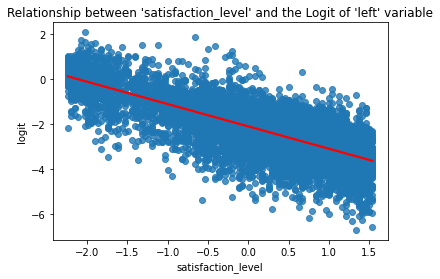

In [64]:
logit_plot(logit_data, 'satisfaction_level')

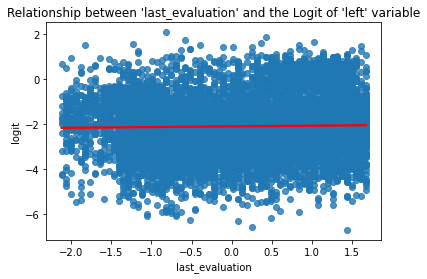

In [65]:
logit_plot(logit_data, 'last_evaluation')

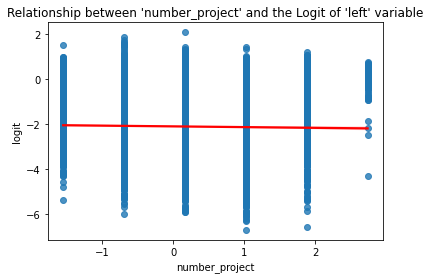

In [66]:
logit_plot(logit_data, 'number_project')

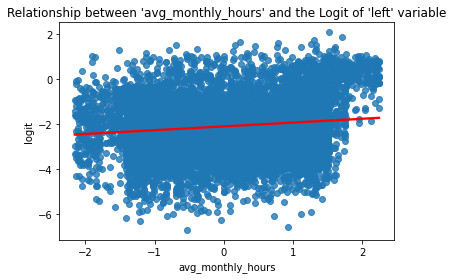

In [67]:
logit_plot(logit_data, 'avg_monthly_hours')

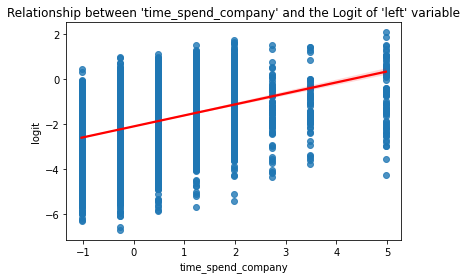

In [68]:
logit_plot(logit_data, 'time_spend_company')

What I did: 

> I generated an array of predicted probabilities from the logistic regression model. From it, I calculated the logit of the True value probability from the array and added it to the training data. Then, created a custom function to draw linear regression plots for every continuous (or continuous-like) variables against the calculated logit.

Comments:
>Even though some plots (like 'last_evaluation' and 'number_projects') show little to no predictive power due to their flat line relationship with the logit of the target variable, no plot indicate a visual curvature or u-shaped patterns characteristic of non-linear relationships. Therefore, linarity, our last assumption, is considered mostly validated, so is our logistic regression model.

**7. Evaluate model performances**

Let's evaluate the performances of our model on test data. We'll generate the metrics that will be useful when trying to interpret the model.


In [69]:
# Generate predictions on X_test

y_preds = clf.predict(X_test)

In [70]:
# Generate a classification report

classification_report1 = classification_report(y_test, y_preds, target_names=['retained', 'left'])

print(classification_report1)

              precision    recall  f1-score   support

    retained       0.86      0.96      0.91      2500
        left       0.50      0.18      0.27       498

    accuracy                           0.83      2998
   macro avg       0.68      0.57      0.59      2998
weighted avg       0.80      0.83      0.80      2998



**8. Generate a confusion matrix**

To visualize the metrics, we will plot a confusion matrix.

In [71]:
cm = confusion_matrix(y_test, y_preds, labels=clf.classes_)

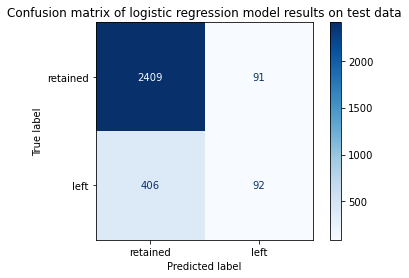

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['retained', 'left'])

disp.plot(values_format='', cmap='Blues')

plt.title('Confusion matrix of logistic regression model results on test data')

plt.show()

Comments
> STOP

> We need to step back a little bit, this model is problematic, as it has clearly overlearned the majority class (retained employes). Let's reevaluate our predictor selection and rebuild the model. The preprocessing must be done again as well as VIF.

**Revised Methodology**

1. EDA
2. Data engineering: Variable selection
3. Data engineering: Encode categorical variables
4. Split the data into a training and testing set
5. Data engineering: Standardization
6. Variance Inflation Factors (VIF) on training data to verify multicollinearity
7. Fit a logistic regression model
8. Verify the assumption of logit linearity
9. Evaluate the performance of the model on test set
10. Plot a confusion matrix
11. Plot ROC curve and evaluate AUC metric
12. Find the optimal theshold for a better predictive model
13. Generate a coefficient bar plot

**1. Go back to EDA**

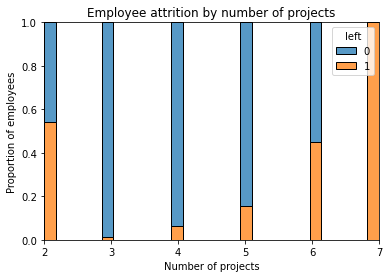

In [73]:
# Histogram of number of projects

sns.histplot(data=df_clean, x='number_project', hue='left',  multiple='fill')
plt.title('Employee attrition by number of projects')
plt.xlabel('Number of projects'); plt.ylabel('Proportion of employees')
plt.show()

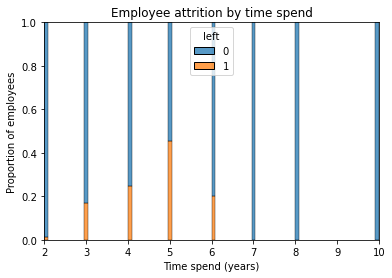

In [74]:
# Histogram of attrition by time spend

sns.histplot(data=df_clean, x='time_spend_company', hue='left',  multiple='fill')
plt.title('Employee attrition by time spend')
plt.xlabel('Time spend (years)'); plt.ylabel('Proportion of employees')
plt.show()

New predictor variable selection:
- satisfaction_level (standardized): good predictor to keep
- last_evaluation (standardized): weak predictor. We will drop it and replace it with archetypes that will be dummy encoded
- number_project: the histogram plotted above shows a non-linear pattern. 2 projects shows high level of attrition, between 3 and 5 projects, we have low to medium level, and with 6 and more we have again a high level. We will therefore consider these values as categorical because one slope will not fit these shapes. These categories will be dummy encoded and we will drop the reference category which, in this case, will be 3 projects which shows the lowest attrition
- avg_monthly_hours(standardized): good predictor to keep
- time_spend_company: the histogram plotted above shows a relatively linear pattern (we must keep in mind that 6 years and more data are outliers). Therefore, we will keep these discrete values standardized
- work_accident: will be drop, because it contributes to over-learning of the majority class and it is not helpful/unethic. This variable shows that more accident leads to less attrition, but it is not an interesting predictor to keep.
- promo_last_5yrs: binary variable to keep, good predictor
- department: dummy encoded introduces noise (9 columns) and since we have shown during EDA that the problem is more a systemic one than a localized one, than it make sense to keep them out.
- salary: good predictor to keep as label encoded (ordinal)
- archetype: Will take the place of last_evaluation and will be dummy encoded. The category 'S_LP' shows the lowest attrition and will serve as our reference category

In [75]:
df_clean2.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'avg_monthly_hours', 'time_spend_company', 'work_accident', 'left',
       'promo_last_5yrs', 'department', 'salary', 'archetype'],
      dtype='object')

**2. Variable selection**

We'll drop the following variables:
- last_evaluation
- work_accident
- department

In [76]:
df_clean2 = df_clean2.drop(['last_evaluation', 'work_accident', 'department'], axis=1)

df_clean2.head()

,satisfaction_level,number_project,avg_monthly_hours,time_spend_company,left,promo_last_5yrs,salary,archetype
0,0.38,2,157,3,1,0,low,MD_LP
1,0.80,5,262,6,1,0,medium,S_HP
2,0.11,7,272,4,1,0,medium,VD_HP
3,0.72,5,223,5,1,0,low,S_HP
4,0.37,2,159,3,1,0,low,MD_LP


**3. Encode categorical variables**

We'll encode the following variables:
- number_project (One-Hot): it is a discrete values, but it will be treated as categorical.
- salary (ordinal label encoding)
- archetype (One-Hot)

In [77]:
# number_project and archetype One-Hot encoding

df_clean2_encode = pd.get_dummies(df_clean2, columns=['number_project', 'archetype'], drop_first=False)

df_clean2_encode.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,left,promo_last_5yrs,salary,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_LP,archetype_S_HP
0,0.38,157,3,1,0,low,1,0,0,0,0,0,0,0,1,0,0,0
1,0.80,262,6,1,0,medium,0,0,0,1,0,0,0,0,0,0,0,1
2,0.11,272,4,1,0,medium,0,0,0,0,0,1,0,1,0,0,0,0
3,0.72,223,5,1,0,low,0,0,0,1,0,0,0,0,0,0,0,1
4,0.37,159,3,1,0,low,1,0,0,0,0,0,0,0,1,0,0,0


In [78]:
# drop number_project_3 and archetype_S_LP columns

df_clean2_encode = df_clean2_encode.drop(['number_project_3', 'archetype_S_LP'], axis=1)

df_clean2_encode.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,left,promo_last_5yrs,salary,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP
0,0.38,157,3,1,0,low,1,0,0,0,0,0,0,1,0,0
1,0.80,262,6,1,0,medium,0,0,1,0,0,0,0,0,0,1
2,0.11,272,4,1,0,medium,0,0,0,0,1,0,1,0,0,0
3,0.72,223,5,1,0,low,0,0,1,0,0,0,0,0,0,1
4,0.37,159,3,1,0,low,1,0,0,0,0,0,0,1,0,0


In [79]:
salary_encoding = {
    'low':0,
    'medium':1,
    'high':2
}

df_clean2_encode['salary2'] = df_clean2_encode['salary'].map(salary_encoding)

df_clean2_encode = df_clean2_encode.drop('salary', axis=1)



In [80]:
df_clean2_encode.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,left,promo_last_5yrs,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP,salary2
0,0.38,157,3,1,0,1,0,0,0,0,0,0,1,0,0,0
1,0.80,262,6,1,0,0,0,1,0,0,0,0,0,0,1,1
2,0.11,272,4,1,0,0,0,0,0,1,0,1,0,0,0,1
3,0.72,223,5,1,0,0,0,1,0,0,0,0,0,0,1,0
4,0.37,159,3,1,0,1,0,0,0,0,0,0,1,0,0,0


**4. Split data**

In [81]:
X2 = df_clean2_encode.drop('left', axis=1)

y2 = df_clean2_encode.left

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=42)

**5. Standardization**

We'll standardize the following variables:
- satisfaction_level
- avg_monthly_hours
- time_spend_company

In [82]:
scaler2 = StandardScaler()

cols =[
        'satisfaction_level',
        'avg_monthly_hours',
        'time_spend_company'
    ]

X_train2[cols] = scaler2.fit_transform(X_train2[cols])

X_train2.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,promo_last_5yrs,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP,salary2
982,0.502729,1.214245,1.223146,0,0,0,1,0,0,0,0,0,0,1,0
609,-2.236517,1.132073,0.471899,0,0,0,0,0,1,0,1,0,0,0,1
7024,0.212203,-1.374166,0.471899,0,0,0,0,0,0,0,0,0,0,0,1
6402,-0.161331,-0.223761,-1.030593,0,0,1,0,0,0,0,0,0,1,0,1
8379,-0.161331,0.330898,0.471899,0,0,0,0,0,0,0,0,0,1,0,1


In [83]:
X_test2[cols] = scaler2.transform(X_test2[cols])

X_test2.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,promo_last_5yrs,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP,salary2
11089,0.253707,1.049901,-0.279347,0,0,1,0,0,0,0,0,0,0,1,1
5463,-1.821480,-0.408648,0.471899,0,0,0,1,0,0,1,0,0,0,0,1
7358,0.668744,0.556871,-1.030593,0,1,0,0,0,0,0,0,0,0,1,1
3596,0.419722,0.906101,-1.030593,0,0,1,0,0,0,0,0,0,0,1,0
3239,0.544233,-1.045479,-1.030593,0,0,0,0,0,0,0,0,0,0,0,1


**6. VIF**

In [84]:
# Add a constant column

X_vif = sm.add_constant(X_train2)

# Create a table of VIF

X_vif_data = pd.DataFrame()

X_vif_data['variable'] = X_vif.columns

X_vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

#variance_inflation_factor(X_vif.values, 3)

X_vif_data

,variable,VIF
0,const,11.038051
1,satisfaction_level,6.134457
2,avg_monthly_hours,1.213400
3,time_spend_company,1.085693
4,promo_last_5yrs,1.013367
5,number_project_2,1.579788
6,number_project_4,1.428299
7,number_project_5,1.368239
8,number_project_6,1.564059
9,number_project_7,1.265798


Comments:
> There is medium collinearity with the satisfaction_level variable now. It is not surprising as the archetype variables added where constructed using satisfaction_level. A VIF of 6.13 is a medium collinearity. The assumption is then not fully respected but not invalidated either, as logistic regression will tolerate it. We'll keep the two predictors because they are both valuable for interpretability.

**7. Fit a logistic regression model**

In [85]:
clf2 = LogisticRegression(penalty='none', max_iter=1000)

clf2.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000, penalty='none')

In [86]:
coefs2 = clf2.coef_

coefs1D = coefs2.ravel()

coefs_series2 = pd.Series(coefs1D, index=X_train2.columns, name='coefficient')

coefs_series2

satisfaction_level    -0.931818
avg_monthly_hours      0.595835
time_spend_company     0.684583
promo_last_5yrs       -1.383310
number_project_2       4.920157
number_project_4       1.712906
number_project_5       2.575989
number_project_6       3.280285
number_project_7      19.338757
archetype_VD_LP       -1.306588
archetype_VD_HP        1.698721
archetype_MD_LP        3.136901
archetype_MD_HP        0.123849
archetype_S_HP         3.567659
salary2               -0.634925
Name: coefficient, dtype: float64

In [87]:
intercept2 = clf2.intercept_

intercept2

array([-7.03407429])

Comments
> These coefficients are from much more stronger signals than with those of the first model. This is a good sign.

**8. Verify the assumption of linearity (logit)**

In [88]:
#Get the calculated probability values

training_probabilities2 = clf2.predict_proba(X_train2)

training_probabilities2

array([[4.49681540e-01, 5.50318460e-01],
       [7.17492612e-08, 9.99999928e-01],
       [9.99766584e-01, 2.33415720e-04],
       ...,
       [7.41588352e-01, 2.58411648e-01],
       [9.99678462e-01, 3.21538410e-04],
       [5.10295503e-08, 9.99999949e-01]])

In [89]:
# Copy X_train

logit_data2 = X_train2.copy()

In [90]:
# Values of class 1 probabilities

p_class1 = training_probabilities2[:,1]

# Add it to logit_data

logit_data2['logit'] = np.log(p_class1/(1-p_class1))

logit_data2.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,promo_last_5yrs,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP,salary2,logit
982,0.502729,1.214245,1.223146,0,0,0,1,0,0,0,0,0,0,1,0,0.201957
609,-2.236517,1.132073,0.471899,0,0,0,0,0,1,0,1,0,0,0,1,16.450088
7024,0.212203,-1.374166,0.471899,0,0,0,0,0,0,0,0,0,0,0,1,-8.362456
6402,-0.161331,-0.223761,-1.030593,0,0,1,0,0,0,0,0,0,1,0,1,-6.520765
8379,-0.161331,0.330898,0.471899,0,0,0,0,0,0,0,0,0,1,0,1,-6.874604


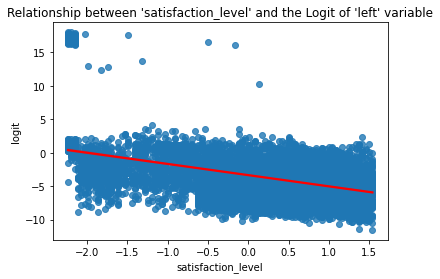

In [91]:
logit_plot(logit_data2, 'satisfaction_level')

Comment:
> These "outliers" are surprising in the logit plot above, but they come from very small or very large values of p. They are normal and this variable does not variable the logit linearity assumption.

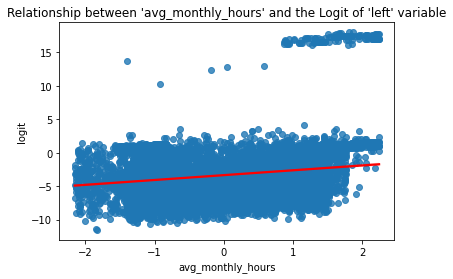

In [92]:
logit_plot(logit_data2, 'avg_monthly_hours')

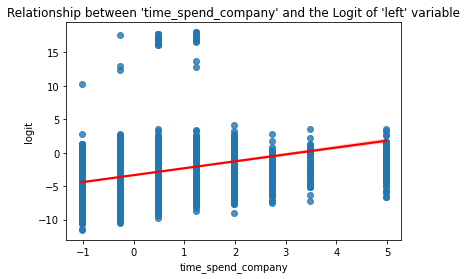

In [93]:
logit_plot(logit_data2, 'time_spend_company')

Comment:
> Even though there are noisy mathematical artifacts in these graphs, we can see that there is an approximately linear trend in the log-odds. Therefore, the linearity assumption is met and there is no need for transformation.

**9. Evaluate model performance**

In [94]:
# Generate predictions on X_test2

y_preds2 = clf2.predict(X_test2)

In [95]:
# Generate a classification report

classification_report2 = classification_report(y_test2, y_preds2, target_names=['retained', 'left'])

print('Classification report (Model 1)')
print()
print(classification_report1)
print()
print()
print('Classification report (Model 2)')
print()
print(classification_report2)

Classification report (Model 1)

              precision    recall  f1-score   support

    retained       0.86      0.96      0.91      2500
        left       0.50      0.18      0.27       498

    accuracy                           0.83      2998
   macro avg       0.68      0.57      0.59      2998
weighted avg       0.80      0.83      0.80      2998



Classification report (Model 2)

              precision    recall  f1-score   support

    retained       0.94      0.95      0.95      2500
        left       0.74      0.69      0.72       498

    accuracy                           0.91      2998
   macro avg       0.84      0.82      0.83      2998
weighted avg       0.91      0.91      0.91      2998



Comment:
> The second model is undoubtedly better than the first one on all metrics. Precision improved by 24%, recall by 51%, F1 score by 45% and accuracy by 8%. This will help ensure our model can predict well enought the minority class, which will lead to meaningful factor influence

**10. Plot a confusion matrix**

In [96]:
cm2 = confusion_matrix(y_test2, y_preds2, labels=clf2.classes_)

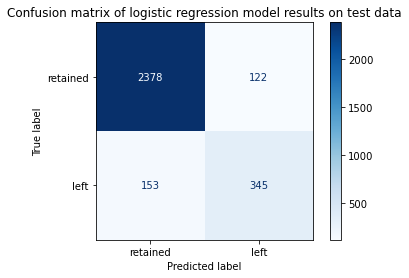

In [97]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=['retained', 'left'])

disp2.plot(values_format='', cmap='Blues')

plt.title('Confusion matrix of logistic regression model results on test data')

plt.show()

Comments:
> We can see right here that the model catches 3 to 4 times more positives than previous model iteration. There is almost as much Type I error as there is Type II, meaning the model is more balanced also.

**11. Plot ROC Curve and evaluate AUC metric**

In [98]:
# Predict probabilities for test data

y_test2_proba = clf2.predict_proba(X_test2)[:,1]

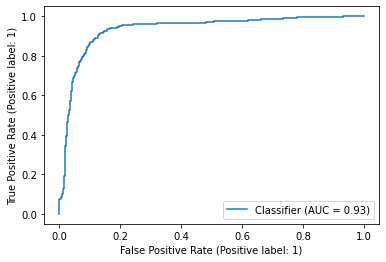

In [99]:
# Plot the ROC curve from probabilities of 'left'

RocCurveDisplay.from_predictions(y_test2, y_test2_proba)

plt.show()

In [100]:
roc_auc_score(y_test2, y_test2_proba)

0.9339887550200803

Comments:
> 0.93 is a really good AUC score. At a recall (True positive rate) of 0.69, I can see that my threshold can be adjusted to have better predictive results. This give me the idea to choose a better threshold to get a better predictive model.

>Let's evaluate the impact on the business:
- False positives are employees that have been predicted to leave but don't leave actually
    - More of those have a cost on RH involvement, risking over-investing in an employee that doesn't want to leave
    - It's time-consuming but may lead to more satisfaction
    - We don't want to follow with too much employees
- False negatives are employees predicted to stay but leave actually
    - Lost of an employee (hard-working and experienced ones)
    - More cost in recruitment and training
- In most cases a false negative is more costly than a false positive. 
- We don't want a model that predict a danger zone for too much people, hence we need to fin a balance.
- We would look for a ratio of something like 2 false positives for 1 false negative ($F_{\text{beta2}}$)

**12. Find an  optimal threshold for the best predicting model**

In [101]:
# Default model F2 score

fbeta_score(y_test2, y_preds2, beta=2)

0.7015046766978447

In [102]:
# Array of 1000 thresholds

thresholds = np.arange(0,1,0.001)


In [103]:
# Compute the scores from the list of thresholds

f2_scores = [fbeta_score(y_test2, (y_test2_proba>=threshold).astype(int), beta=2) for threshold in thresholds]

In [104]:
# Find the max F2 score value

best_f2 = max(f2_scores)

print(best_f2)

0.8192597915918074


In [105]:
# Find the index of the best F2 score and find the threshold

i = f2_scores.index(best_f2)
best_threshold = thresholds[i]

best_threshold

0.179

In [106]:
# Verify

fbeta_score(y_test2, (y_test2_proba>=0.179).astype(int), beta=2)

0.8192597915918074

In [107]:
# Custom predictions values

y_preds2_custom = (y_test2_proba>=0.179).astype(int)

In [108]:
# Generate a classification report

classification_report2_2 = classification_report(y_test2, y_preds2_custom, target_names=['retained', 'left'])

print('Classification report (Model 2.1)')
print()
print(classification_report2)
print()
print()
print('Classification report (Model 2.2)')
print()
print(classification_report2_2)

Classification report (Model 2.1)

              precision    recall  f1-score   support

    retained       0.94      0.95      0.95      2500
        left       0.74      0.69      0.72       498

    accuracy                           0.91      2998
   macro avg       0.84      0.82      0.83      2998
weighted avg       0.91      0.91      0.91      2998



Classification report (Model 2.2)

              precision    recall  f1-score   support

    retained       0.98      0.87      0.92      2500
        left       0.58      0.92      0.71       498

    accuracy                           0.87      2998
   macro avg       0.78      0.89      0.81      2998
weighted avg       0.91      0.87      0.88      2998



In [109]:
cm2_2 = confusion_matrix(y_test2, y_preds2_custom, labels=clf2.classes_)

cm2_2

array([[2165,  335],
       [  42,  456]])

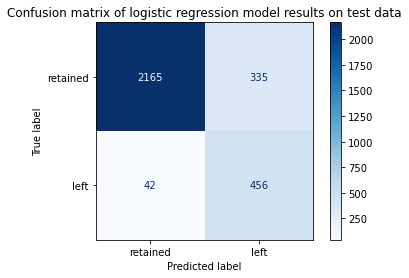

In [110]:
disp2_2 = ConfusionMatrixDisplay(confusion_matrix=cm2_2, display_labels=['retained', 'left'])

disp2_2.plot(values_format='', cmap='Blues')

plt.title('Confusion matrix of logistic regression model results on test data')

plt.show()

**13. Generate a coefficient bar plot**

In [111]:
# Create a list of (col names, coefficient) tuples

coef_list = list(zip(coefs_series2.index, coefs_series2.values))

# Sort the list by coefficient value

coef_list_sorted = sorted(coef_list, key=lambda x:abs(x[1]))

coef_list_sorted

[('archetype_MD_HP', 0.12384925198723126),
 ('avg_monthly_hours', 0.5958353593779462),
 ('salary2', -0.6349249036353974),
 ('time_spend_company', 0.6845833931401645),
 ('satisfaction_level', -0.931817753774582),
 ('archetype_VD_LP', -1.3065881779664168),
 ('promo_last_5yrs', -1.3833095639246662),
 ('archetype_VD_HP', 1.6987205941978323),
 ('number_project_4', 1.7129063616471403),
 ('number_project_5', 2.575989446763714),
 ('archetype_MD_LP', 3.1369013471649176),
 ('number_project_6', 3.2802852525393376),
 ('archetype_S_HP', 3.567658928291587),
 ('number_project_2', 4.920157259885353),
 ('number_project_7', 19.338756634846078)]

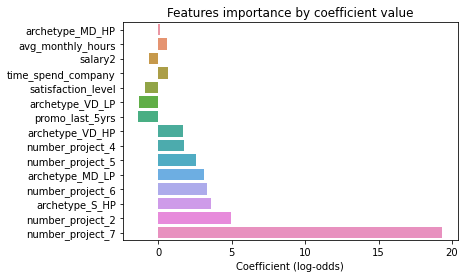

In [112]:
# plot the feature importances

sns.barplot(
    x=[x[1] for x in coef_list_sorted],
    y=[x[0] for x in coef_list_sorted],
    orient='h'
)

plt.title('Features importance by coefficient value')
plt.xlabel("Coefficient (log-odds)")
plt.show()


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




In [113]:
# Transform feature importances

pd.set_option('display.float_format', '{:.10f}'.format)

#Create a DataFrame from coef_list_sorted
coef_df = pd.DataFrame(coef_list_sorted, columns=['variable', 'coefficient'])

#Exponentiate the coefficient
coef_df['exponentiate'] = np.exp(coef_df['coefficient']).astype('float')

#Find the percentage of influence
coef_df['influence_odds_percent'] = (coef_df['exponentiate'] - 1)*100


coef_df


,variable,coefficient,exponentiate,influence_odds_percent
0,archetype_MD_HP,0.1238492520,1.1318452347,13.1845234718
1,avg_monthly_hours,0.5958353594,1.8145461101,81.4546110128
2,salary2,-0.6349249036,0.5299752860,-47.0024713959
3,time_spend_company,0.6845833931,1.9829455547,98.2945554711
4,satisfaction_level,-0.9318177538,0.3938371603,-60.6162839672
5,archetype_VD_LP,-1.3065881780,0.2707422066,-72.9257793390
6,promo_last_5yrs,-1.3833095639,0.2507473140,-74.9252685966
7,archetype_VD_HP,1.6987205942,5.4669484699,446.6948469859
8,number_project_4,1.7129063616,5.5450540132,454.5054013248
9,number_project_5,2.5759894468,13.1443163277,1214.4316327688


What I did:
> I exponentiate the log odds to obtain the real change of odds as a percentage per one-unit increase

In [114]:
# Find the original sets 

X_train2_0, X_test2_0, y_train2_0, y_test2_0 = train_test_split(X2, y2, test_size=0.25, stratify=y2, random_state=42)

In [115]:
print(X_train2_0['satisfaction_level'].std())
print(X_train2_0['avg_monthly_hours'].std())
print(X_train2_0['time_spend_company'].std())

0.24095557932603784
48.68121779371134
1.331195275022362


In [116]:
#Instantiate a general delta
coef_df['delta'] = 1.00

#Delta of satisfaction_level
coef_df.loc[coef_df['variable']=='satisfaction_level', 'delta'] = 0.25/0.2409

#Delta of avg_monthly_hours
coef_df.loc[coef_df['variable']=='avg_monthly_hours', 'delta'] = 50/48.68

#Delta of time_spend_company
coef_df.loc[coef_df['variable']=='time_spend_company', 'delta'] = 1/1.331

coef_df

,variable,coefficient,exponentiate,influence_odds_percent,delta
0,archetype_MD_HP,0.1238492520,1.1318452347,13.1845234718,1.0000000000
1,avg_monthly_hours,0.5958353594,1.8145461101,81.4546110128,1.0271158587
2,salary2,-0.6349249036,0.5299752860,-47.0024713959,1.0000000000
3,time_spend_company,0.6845833931,1.9829455547,98.2945554711,0.7513148009
4,satisfaction_level,-0.9318177538,0.3938371603,-60.6162839672,1.0377750104
5,archetype_VD_LP,-1.3065881780,0.2707422066,-72.9257793390,1.0000000000
6,promo_last_5yrs,-1.3833095639,0.2507473140,-74.9252685966,1.0000000000
7,archetype_VD_HP,1.6987205942,5.4669484699,446.6948469859,1.0000000000
8,number_project_4,1.7129063616,5.5450540132,454.5054013248,1.0000000000
9,number_project_5,2.5759894468,13.1443163277,1214.4316327688,1.0000000000


In [117]:
# Exponentiate with coefficient times delta

#New coefficients
coef_df['coefficient2'] = coef_df['coefficient']*coef_df['delta']

#Exponentiate the coefficient2

coef_df['exponentiate2'] = np.exp(coef_df['coefficient2']).astype('float')

#Find the percentage of influence
coef_df['influence_odds_percent2'] = (coef_df['exponentiate2'] - 1)*100

#Sort
coef_df = coef_df.sort_values('coefficient2', key=abs).reset_index(drop=True)

#Rename the variables names:
coef_df['variable'] = coef_df['variable'].replace({
    'archetype_MD_HP': 'Archetype: MD-HP',
    'salary2': 'Salary category increase',
    'satisfaction_level':'Satisfaction level (+25%)',
    'time_spend_company':'Tenure (+1 year)',
    'archetype_VD_LP':'Archetype: VD-LP',
    'promo_last_5yrs':'Promotion (last 5 years)',
    'avg_monthly_hours':'Average monthly hours (+50 hours)',
    'archetype_VD_HP':'Archetype: VD-HP',
    'number_project_4':'4 projects',
    'number_project_5':'5 projects',
    'archetype_MD_LP':'Archetype: MD-LP',
    'number_project_6':'6 projects',
    'archetype_S_HP':'Archetype: S-HP',
    'number_project_2':'2 projects',
    'number_project_7':'7 projects'
})


coef_df


,variable,coefficient,exponentiate,influence_odds_percent,delta,coefficient2,exponentiate2,influence_odds_percent2
0,Archetype: MD-HP,0.1238492520,1.1318452347,13.1845234718,1.0000000000,0.1238492520,1.1318452347,13.1845234718
1,Tenure (+1 year),0.6845833931,1.9829455547,98.2945554711,0.7513148009,0.5143376357,1.6725303105,67.2530310486
2,Average monthly hours (+50 hours),0.5958353594,1.8145461101,81.4546110128,1.0271158587,0.6119919468,1.8441010939,84.4101093872
3,Salary category increase,-0.6349249036,0.5299752860,-47.0024713959,1.0000000000,-0.6349249036,0.5299752860,-47.0024713959
4,Satisfaction level (+25%),-0.9318177538,0.3938371603,-60.6162839672,1.0377750104,-0.9670171791,0.3802154630,-61.9784537015
5,Archetype: VD-LP,-1.3065881780,0.2707422066,-72.9257793390,1.0000000000,-1.3065881780,0.2707422066,-72.9257793390
6,Promotion (last 5 years),-1.3833095639,0.2507473140,-74.9252685966,1.0000000000,-1.3833095639,0.2507473140,-74.9252685966
7,Archetype: VD-HP,1.6987205942,5.4669484699,446.6948469859,1.0000000000,1.6987205942,5.4669484699,446.6948469859
8,4 projects,1.7129063616,5.5450540132,454.5054013248,1.0000000000,1.7129063616,5.5450540132,454.5054013248
9,5 projects,2.5759894468,13.1443163277,1214.4316327688,1.0000000000,2.5759894468,13.1443163277,1214.4316327688


What I did:
> Since the odds increase or decrease of continous variables are expressed in standard deviation, we must instantiate some more meaningful values. The initial standard variations were computed and rounded to something more meaningful, then the odds increase and decrease were recalculated following these numbers. 
- 1 SD of satisfaction_level = 0.2409 (24.09%) => 0.25
- 1 SD of avg_monthly_hours = 48.68 hours => 50 hours
- 1 SD of time_spend_company = 1.331 years => 1 year

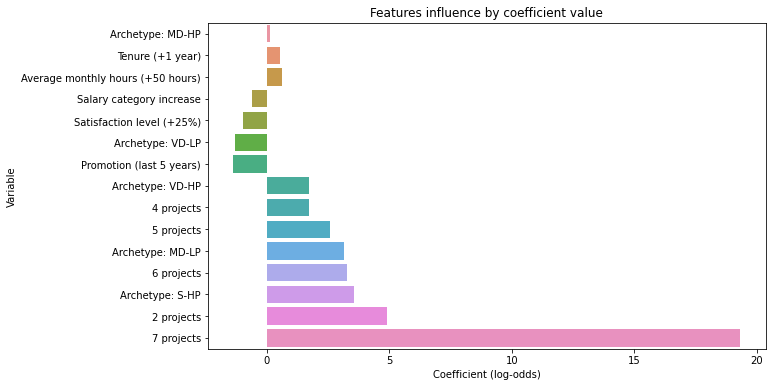

In [118]:
# plot the feature importances

plt.figure(figsize=(10,6))

sns.barplot(
    data=coef_df,
    x='coefficient2',
    y='variable',
    orient='h'
)
plt.title('Features influence by coefficient value')
plt.xlabel("Coefficient (log-odds)")
plt.ylabel('Variable')
plt.show()

In [119]:
coef_df_clean = coef_df.loc[0:13]

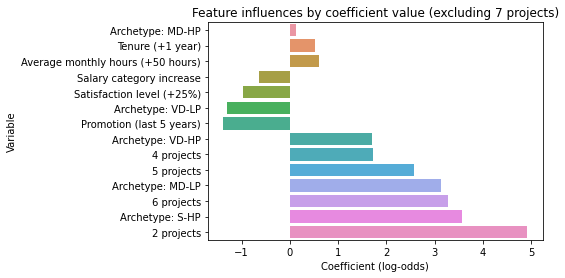

In [121]:
# plot the feature importances


sns.barplot(
    data=coef_df_clean,
    x='coefficient2',
    y='variable',
    orient='h'
)
plt.title('Feature influences by coefficient value (excluding 7 projects)')
plt.xlabel("Coefficient (log-odds)")
plt.ylabel('Variable')
plt.show()

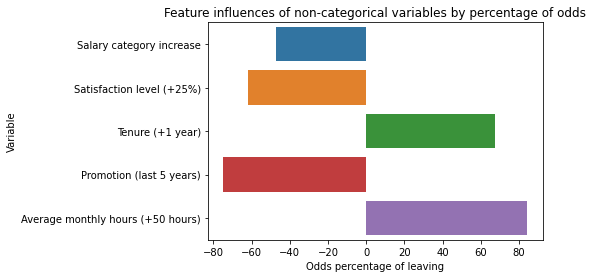

In [122]:
# plot the feature importances
rows = ['Salary category increase', 
        'Satisfaction level (+25%)', 
        'Tenure (+1 year)', 
        'Average monthly hours (+50 hours)',
        'Promotion (last 5 years)'
       ]


sns.barplot(
    data=coef_df.loc[coef_df['variable'].isin(rows)].sort_values('influence_odds_percent2', key=abs).reset_index(drop=True),
    x='influence_odds_percent2',
    y='variable',
    orient='h'
)
plt.title('Feature influences of non-categorical variables by percentage of odds')
plt.xlabel("Odds percentage of leaving")
plt.ylabel('Variable')
plt.show()

In [124]:
# Now let's create a final bar chart to represente the distribution of predicted values among all archetypes

# Let's begin with adding probability values calculated by the optimal model to the test set

test_df = pd.concat([X_test2_0, y_test2_0], axis=1)

test_df['archetype'] = df_clean2['archetype']

test_df['prediction'] = y_preds2_custom

test_df.head()

,satisfaction_level,avg_monthly_hours,time_spend_company,promo_last_5yrs,number_project_2,number_project_4,number_project_5,number_project_6,number_project_7,archetype_VD_LP,archetype_VD_HP,archetype_MD_LP,archetype_MD_HP,archetype_S_HP,salary2,left,archetype,prediction
11089,0.6900000000,252,3,0,0,1,0,0,0,0,0,0,0,1,1,0,S_HP,0
5463,0.1900000000,181,4,0,0,0,1,0,0,1,0,0,0,0,1,0,VD_LP,0
7358,0.7900000000,228,2,0,1,0,0,0,0,0,0,0,0,1,1,0,S_HP,1
3596,0.7300000000,245,2,0,0,1,0,0,0,0,0,0,0,1,0,0,S_HP,0
3239,0.7600000000,150,2,0,0,0,0,0,0,0,0,0,0,0,1,0,S_LP,0


In [125]:
# Create a series of conditions that will recreate the categories assigned

conditions=[
    (test_df['left']==0) & (test_df['prediction']==0),
    (test_df['left']==1) & (test_df['prediction']==0),
    (test_df['left']==0) & (test_df['prediction']==1),
    (test_df['left']==1) & (test_df['prediction']==1)
]

choices=[
    'True Negative',
    'False Negative',
    'False Positive',
    'True Positive'
]

test_df['Decision'] = np.select(conditions, choices, default='Error')

test_df['Decision'].value_counts()

True Negative     2165
True Positive      456
False Positive     335
False Negative      42
Name: Decision, dtype: int64

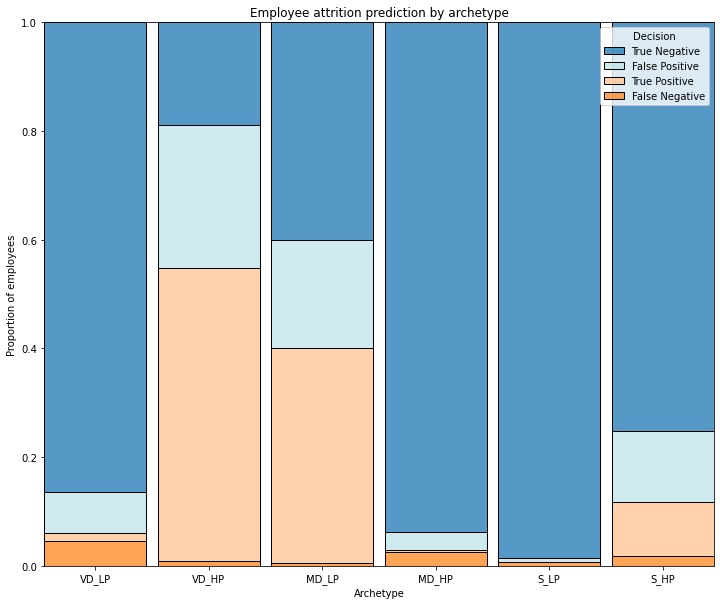

In [126]:
plt.figure(figsize=(12,10))
sns.histplot(data=test_df, x='archetype', hue='Decision', multiple='fill', shrink=0.9, palette=["#1f77b4", "#bee4ea", "#ffc491", "#ff851c"])
plt.title('Employee attrition prediction by archetype')
plt.xlabel('Archetype'); plt.ylabel('Proportion of employees')
plt.show()

### Summary of model results

Our final logistic regression model was optimized with F2 score to allow the least amount of employees to go away without being noticed (False Negative), but also in the mind of keeping a limit of people that has to be seen by Human Resources. This model was preferred because we consider it much less costly to invest time and resources into an experienced employees than to recruit and train a new one.
From a test set of 2998 employees (25% of total), the optimized model (threshold = 0.179) got the following scores:
- precision: 58%
- recall: 92%
- F1 score: 71%
- F2 score: 82%
- accuracy: 87%

For comparison, the default model (threshold = 0.5) got the following scores:
- precision: 74%
- recall: 69%
- F1 score: 72%
- F2 score: 70%
- accuracy: 91%

We can clearly see from these results that recall is significantly better in the optimized model by 23% at the expanse of the precision that dropped by 16%, meaning the optimal model catched more True Positives overall, but with less precision (high rate of False Positives)

Both models have an Area Under the Curve (AUC) score of 93%, which is a sign of a very good ability to distinguish between the two classes (random would be 50%).

|          | Optimized model | Non-optimized model |
|----------|----------|----------|
| Predicted correctly left | 456 | 345  |
| Predicted correctly stayed  | 2165  | 2378  |
| Falsely predicted left  | 335 | 122  |
| Falsely predicted stayed  | 42  | 153  |

We see that the optimized model reduced False Negatives by 73%, more employees that will be correctly identified using this model. With 42 False Negatives, only 8% of the employees will not be catched.

There will still be a lot of reasons why somebody decides to leave a business that cannot be explain by contextual data alons. However, this is still convincing results of a well-built model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.